In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

In [0]:
import h5py
import numpy as np


Open the data file as read only.

In [0]:
h5f = h5py.File('/content/drive/My Drive/AIML/Projects/Neural Network/SVHN_single_grey1.h5','r')

**IMPORT DATASET**

In [5]:
list(h5f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

The SVHN dataset contains data split into 'X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'. In the next step we will load this data.

**Load the training, test and validation set**


In [0]:
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
X_val = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
y_val = h5f['y_val'][:]

In [0]:
h5f.close()

Let us explore the shape of X_train, X_test and X_val & y_train, y_test and y_val

In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)
(42000,)
(18000,)
(60000,)


**Visualizing the numbers in the image dataset**

Label: 6


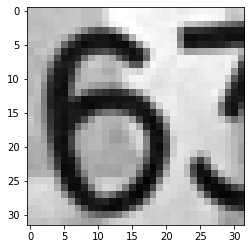

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1]))
plt.imshow(X_train[1],cmap='gray')

As mentioned in the problem statement, there is a visbile distraction in the immage where the image is multidigit, with one digit "6" is fully visibile and other digit "3" is partially visible.

In [10]:
print("Label: {}".format(y_train))

Label: [2 6 7 ... 7 0 4]


In [11]:
y_train.max()

9

In [12]:
y_train.min()

0

In [13]:
print(X_train.max())
print(X_train.min())
X_train = X_train / 254.9745
X_val = X_val / 254.9745
X_test = X_test / 254.9745
print(X_train.max())
print(X_train.min())

254.9745
0.0
1.0
0.0


*   x_train, x_test: array of image data with shape (num_samples, 32, 32)
*   y_train, y_test: array of digit labels (integers in range 0-9) with shape (num_samples,).
X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

**One-hot encode the class vector**

*   convert class vectors (integers) to binary class matrix
*   convert y_train and y_test
*   number of classes: 10
*   we are doing this to use categorical_crossentropy as loss






In [14]:
from tensorflow.keras.utils import to_categorical
print("Value before encoding:", y_train[0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One hot encoded value of y_train:", y_train[0])

Value before encoding: 2
Shape of y_train: (42000, 10)
One hot encoded value of y_train: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers

# **Define the model**

##**MODEL 1**

### **Initialize model**

In [0]:
model = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32)))

###**Applying Batch Normalization**

In [0]:
# Normalize the data
model.add(tensorflow.keras.layers.BatchNormalization())

###**Apply ReLU**

In [0]:
# Hidden layers
model.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
#model.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tensorflow.keras.layers.Dense(80, activation='relu', name='Layer_3'))
model.add(tensorflow.keras.layers.Dense(50, activation='relu', name='Layer_4'))
# Dropout layer
#model.add(tensorflow.keras.layers.Dropout(0.3))

###**Adding output layer**

In [0]:
#Output layer
model.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

###**Compile the model**
Here we configure the model for training. We will specify an optimizer, loss function and a metrics

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

###**Summarize the model**

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
Layer_3 (Dense)              (None, 80)                8080      
_________________________________________________________________
Layer_4 (Dense)              (None, 50)                4050      
_________________________________________________________________
Output (Dense)               (None, 10)                5

###**Fit the model**

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size = 100)

Epoch 1/50
420/420 [==============================] - 3s 7ms/step - loss: 1.4149 - accuracy: 0.5250 - val_loss: 0.9733 - val_accuracy: 0.7057
Epoch 2/50
420/420 [==============================] - 3s 7ms/step - loss: 0.9115 - accuracy: 0.7170 - val_loss: 0.8282 - val_accuracy: 0.7459
Epoch 3/50
420/420 [==============================] - 3s 7ms/step - loss: 0.7754 - accuracy: 0.7565 - val_loss: 0.7394 - val_accuracy: 0.7763
Epoch 4/50
420/420 [==============================] - 3s 7ms/step - loss: 0.6904 - accuracy: 0.7848 - val_loss: 0.7060 - val_accuracy: 0.7889
Epoch 5/50
420/420 [==============================] - 3s 6ms/step - loss: 0.6349 - accuracy: 0.8002 - val_loss: 0.6946 - val_accuracy: 0.7935
Epoch 6/50
420/420 [==============================] - 3s 7ms/step - loss: 0.5928 - accuracy: 0.8148 - val_loss: 0.6670 - val_accuracy: 0.7978
Epoch 7/50
420/420 [==============================] - 3s 6ms/step - loss: 0.5594 - accuracy: 0.8259 - val_loss: 0.6211 - val_accuracy: 0.8151
Epoch 

###**Evaluate the model**

In [23]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.7574 - accuracy: 0.8399


[0.7574344277381897, 0.8399444222450256]

**There is opportunity to further minimize the loss and increase the accuracy. Hyperparameter tuning is needed.**

#**Model 1**

###**Importing the SVHN dataset**

In [0]:
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
h5f = h5py.File('/content/drive/My Drive/AIML/Projects/Neural Network/SVHN_single_grey1.h5','r')

In [0]:
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
X_val = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
y_val = h5f['y_val'][:]

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


###**Reshaping the data from 2D to 1D**

In [28]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


In [29]:
print(X_train.max())
print(X_train.min())
print(X_test.min())
print(X_test.max())

254.9745
0.0
0.0
254.9745


###**Normalizing the dataset**

In [30]:
X_train = X_train / 254.9745
X_test = X_test / 254.9745

print(X_train.max())
print(X_train.min())
X_train.shape

1.0
0.0


(42000, 1024)

###**One-hot encode the class vector**

In [31]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[10])
print(y_test[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


###**Visualizing the images and their labels**

label for each of the below image: 2
label for each of the below image: 6
label for each of the below image: 7
label for each of the below image: 4
label for each of the below image: 4
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 7
label for each of the below image: 3


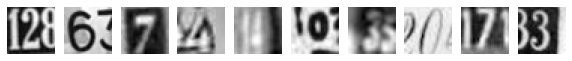

In [32]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()


###**Write a function to create a Model 1**

In [0]:
def train_and_test_loop(iterations, lr, Lambda, verb=True):

    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes = 300
    output_nodes = 10
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(42000, 1024), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    model.fit(X_train, y_train, epochs=iterations, batch_size=1000, verbose= 1)
    score = model.evaluate(X_train, y_train, verbose=0)
    return score

###**Checking the Loss and Regularization**

*   Double Check that the loss is reasonable
*   Disable the regularization (Lambda = 0)



In [34]:
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 35ms/step - loss: 2.4114 - accuracy: 0.1028


[2.4049227237701416, 0.1033809557557106]

**The untrained model shows a accuracy close to 0.1%**

**Increase the Lambda**

In [35]:
lr = 0.00001
Lambda = 1e3
train_and_test_loop(1, lr, Lambda)

42/42 [==============================] - 1s 35ms/step - loss: 3292.3962 - accuracy: 0.1026


[100.09819030761719, 0.09761904925107956]

**The Loss goes up when the Lambda is increased.**

##**Ensuring model architecture is fine**

###**Overfitting the Model**

In [0]:
X_train_subset = X_train[0:20]

In [0]:
y_train_subset = y_train[0:20]

In [0]:
X_train = X_train_subset
y_train = y_train_subset

In [39]:
X_train.shape

(20, 1024)

In [40]:
y_train.shape

(20, 10)

In [41]:
lr = 0.001
Lambda = 0
train_and_test_loop(500, lr, Lambda)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 2.4623 - accuracy: 0.1000
Epoch 2/500
1/1 [==============================] - 0s 970us/step - loss: 2.4452 - accuracy: 0.1000
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 2.4137 - accuracy: 0.1000
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3703 - accuracy: 0.1000
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 2.3185 - accuracy: 0.1000
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 2.2631 - accuracy: 0.1500
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 2.2064 - accuracy: 0.2000
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 2.1504 - accuracy: 0.3000
Epoch 9/500
1/1 [==============================] - 0s 879us/step - loss: 2.0985 - accuracy: 0.3000
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 2.0518 - accuracy: 0.2000
Epoch 11/500
1/1 [=======

[0.16931845247745514, 1.0]

**Good indicator of the model architecture as for a very small loss the accuracy is going to 100. We can now consider fine tuning this model**

##**Trials with Learnign rate and Regularization**

###**Loading the original dataset again**

####**Import the dataset**

In [0]:
h5f = h5py.File('/content/drive/My Drive/AIML/Projects/Neural Network/SVHN_single_grey1.h5','r')

In [0]:
X_train = h5f['X_train'][:]
X_test = h5f['X_test'][:]
X_val = h5f['X_val'][:]
y_train = h5f['y_train'][:]
y_test = h5f['y_test'][:]
y_val = h5f['y_val'][:]

In [44]:
X_train = X_train.reshape(42000, 1024)
print(X_train.shape)
X_test = X_test.reshape(18000, 1024)
print(X_test.shape)

(42000, 1024)
(18000, 1024)


###**Normalize the dataset**

In [45]:
X_train = X_train / 254.9745
X_test = X_test / 254.9745

print(X_train.max())
print(X_train.min())

1.0
0.0


###**One-hot encode the class vector**

In [46]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train[10])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


###**Regularization and Learning Rate**

####**Start with small regularization and find learning rate that makes the loss go down**


*   we start with Lambda(small regularization) = 1e-7
*   we start with a small learning rate = 1e-7

In [47]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 35ms/step - loss: 2.3442 - accuracy: 0.0980
Epoch 2/20
42/42 [==============================] - 1s 33ms/step - loss: 2.3442 - accuracy: 0.0981
Epoch 3/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3441 - accuracy: 0.0981
Epoch 4/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3441 - accuracy: 0.0981
Epoch 5/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3441 - accuracy: 0.0981
Epoch 6/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3440 - accuracy: 0.0981
Epoch 7/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3440 - accuracy: 0.0981
Epoch 8/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3439 - accuracy: 0.0981
Epoch 9/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3439 - accuracy: 0.0981
Epoch 10/20
42/42 [==============================] - 1s 34ms/step - loss: 2.3438 - accuracy: 0.0981
Epoch 11/

[2.343297243118286, 0.09819047898054123]

**The Loss is not reduced indicating that the learing rate may be too low.**

####**Using high learing rate 1e8**

In [48]:
lr = 1e8
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 35ms/step - loss: nan - accuracy: 0.1008
Epoch 2/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 3/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 4/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 5/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 6/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 7/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 8/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 9/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 10/20
42/42 [==============================] - 1s 34ms/step - loss: nan - accuracy: 0.0997
Epoch 11/20
42/42 [====================

[nan, 0.09966666996479034]

**The nan values in the loss indicate exploding loss and the learning rate is too high.**

####**Train now with a value of learning rate between 1e-7 and 1e8**
*  learning rate = 1e4
*  regularization remains the small, lambda = 1e-7



In [49]:
lr = 1e4
Lambda = 1e-7
train_and_test_loop(20, lr, Lambda)

Epoch 1/20
42/42 [==============================] - 1s 35ms/step - loss: inf - accuracy: 0.0984
Epoch 2/20
42/42 [==============================] - 1s 34ms/step - loss: inf - accuracy: 0.1036
Epoch 3/20
42/42 [==============================] - 1s 34ms/step - loss: inf - accuracy: 0.0980
Epoch 4/20
42/42 [==============================] - 1s 34ms/step - loss: 2005486135464343626948194336768.0000 - accuracy: 0.1005
Epoch 5/20
42/42 [==============================] - 1s 34ms/step - loss: 210841385307274197713970790400.0000 - accuracy: 0.0999
Epoch 6/20
42/42 [==============================] - 1s 34ms/step - loss: 22136329006775605421460684800.0000 - accuracy: 0.0989
Epoch 7/20
42/42 [==============================] - 1s 34ms/step - loss: 2324039910585669181448912896.0000 - accuracy: 0.1014
Epoch 8/20
42/42 [==============================] - 1s 35ms/step - loss: 244025705458118597080514560.0000 - accuracy: 0.0989
Epoch 9/20
42/42 [==============================] - 1s 35ms/step - loss: 2562

[114239922503680.0, 0.09966666996479034]

**The Loss is still exploding and learnign rate still seems too high. We wiil have to optimize the hyperparameteres**

# **Hyperparameter Optimization**

## Cross validation


In [50]:
import math
for k in range(1,10):
    lr = math.pow(10, np.random.uniform(-7.0, 3.0))
    Lambda = math.pow(10, np.random.uniform(-7,-2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 100, best_acc, lr, Lambda))

Epoch 1/100
42/42 [==============================] - 1s 35ms/step - loss: 2.3582 - accuracy: 0.0906
Epoch 2/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3575 - accuracy: 0.0904
Epoch 3/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3566 - accuracy: 0.0901
Epoch 4/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3559 - accuracy: 0.0901
Epoch 5/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3551 - accuracy: 0.0897
Epoch 6/100
42/42 [==============================] - 1s 35ms/step - loss: 2.3543 - accuracy: 0.0895
Epoch 7/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3536 - accuracy: 0.0893
Epoch 8/100
42/42 [==============================] - 1s 35ms/step - loss: 2.3528 - accuracy: 0.0892
Epoch 9/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3521 - accuracy: 0.0890
Epoch 10/100
42/42 [==============================] - 1s 34ms/step - loss: 2.3514 - accuracy: 0.0890

**Try 6/100: Best_val_acc: None, lr: 0.03373622959273333, Lambda: 1.65628473556203e-05**

**Number of loops 100, 500, 300**

In [51]:
lr = 0.06369765080380183
Lambda = 1.1457046135394623e-07
train_and_test_loop(300, lr, Lambda)

Epoch 1/300
42/42 [==============================] - 2s 37ms/step - loss: 2.2991 - accuracy: 0.1298
Epoch 2/300
42/42 [==============================] - 2s 37ms/step - loss: 2.1504 - accuracy: 0.2893
Epoch 3/300
42/42 [==============================] - 2s 37ms/step - loss: 1.8589 - accuracy: 0.3821
Epoch 4/300
42/42 [==============================] - 2s 37ms/step - loss: 1.5293 - accuracy: 0.4947
Epoch 5/300
42/42 [==============================] - 2s 37ms/step - loss: 1.3340 - accuracy: 0.5630
Epoch 6/300
42/42 [==============================] - 2s 36ms/step - loss: 1.1892 - accuracy: 0.6222
Epoch 7/300
42/42 [==============================] - 2s 36ms/step - loss: 1.1369 - accuracy: 0.6414
Epoch 8/300
42/42 [==============================] - 2s 37ms/step - loss: 1.1053 - accuracy: 0.6473
Epoch 9/300
42/42 [==============================] - 2s 37ms/step - loss: 1.0296 - accuracy: 0.6780
Epoch 10/300
42/42 [==============================] - 2s 36ms/step - loss: 0.9320 - accuracy: 0.7133

[0.006066175177693367, 0.9997380971908569]

**The Model Accuracy is highly imporved by tuning the hyperparameters.**  

##**Conclusion**

**The Neural Network is able to clsssify the images in the test dataset with an accuracy of 99.96% and loss of 0.0060 by keeping the epochs = 300, lr = 0.06369765080380183 & lambda = 1.1457046135394623e-07**

**The model overfits with increasing loss if the epochs are set to 500 and the lr and lambda values have been already optimized by cross validation strategy of coarse and fine stages of vaidation.**